In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/Shareddrives/FASTlab/

/content/drive/Shareddrives/FASTlab


In [ ]:
cd reSCONE

/content/drive/Shareddrives/FASTlab/reSCONE


In [ ]:
import pandas as pd
import numpy as np

import os
import yaml


In [ ]:
#import sys
#sys.path.append("/content/drive/Shareddrives/FASTlab/reSCONE/scone/config")

In [ ]:
import yaml

# FBB if not running on notebook remove root
root = "/content/drive/Shareddrives/FASTlab/reSCONE/"
root = ""
with open(root + "scone/config/config_test.yml", "r") as stream:
  try:
    config = yaml.safe_load(stream)
    print(config)
  except yaml.YAMLError as exc:
    print(exc)

config

{'metadata_paths': ['TEST00_HEAD.fits'], 'lcdata_paths': ['TEST00_PHOT.fits'], 'ids_path': 'scone/output_dir/0_5_Ia_split_heatmaps_ids.hdf5', 'output_path': 'scone/output_dir', 'num_wavelength_bins': 32, 'num_mjd_bins': 180, 'Ia_fraction': None, 'categorical_min_per_type': 200, 'categorical_max_per_type': 2000, 'heatmaps_path': 'output_dir', 'save_to_json': True, 'from_json': False, 'sn_type_id_to_name': {42: 'SNII', 52: 'SNIax', 62: 'SNIbc', 67: 'SNIa-91bg', 64: 'KN', 90: 'SNIa', 95: 'SLSN-1'}, 'mode': 'train', 'trained_model': '/path/to/trained/model', 'class_balanced': True, 'categorical': False, 'batch_size': 32, 'num_epochs': 400, 'train_proportion': 0.8, 'val_proportion': 0.1, 'has_ids': True, 'with_z': False}


{'metadata_paths': ['TEST00_HEAD.fits'],
 'lcdata_paths': ['TEST00_PHOT.fits'],
 'ids_path': 'scone/output_dir/0_5_Ia_split_heatmaps_ids.hdf5',
 'output_path': 'scone/output_dir',
 'num_wavelength_bins': 32,
 'num_mjd_bins': 180,
 'Ia_fraction': None,
 'categorical_min_per_type': 200,
 'categorical_max_per_type': 2000,
 'heatmaps_path': 'output_dir',
 'save_to_json': True,
 'from_json': False,
 'sn_type_id_to_name': {42: 'SNII',
  52: 'SNIax',
  62: 'SNIbc',
  67: 'SNIa-91bg',
  64: 'KN',
  90: 'SNIa',
  95: 'SLSN-1'},
 'mode': 'train',
 'trained_model': '/path/to/trained/model',
 'class_balanced': True,
 'categorical': False,
 'batch_size': 32,
 'num_epochs': 400,
 'train_proportion': 0.8,
 'val_proportion': 0.1,
 'has_ids': True,
 'with_z': False}

In [ ]:
ls

createHeatmaps.ipynb              runSCONEwithPLASTICCAsFITS.ipynb
input/                            scone/
output_dir/                       venv/


In [ ]:
# FBB modified: moved input to folder input
config['lcdata_paths'] = "input/plasticc_train_lightcurves.csv.gz"
config['metadata_paths'] = "input/plasticc_train_metadata.csv.gz"

In [ ]:
config

{'metadata_paths': 'input/plasticc_train_metadata.csv.gz',
 'lcdata_paths': 'input/plasticc_train_lightcurves.csv.gz',
 'ids_path': 'scone/output_dir/0_5_Ia_split_heatmaps_ids.hdf5',
 'output_path': 'scone/output_dir',
 'num_wavelength_bins': 32,
 'num_mjd_bins': 180,
 'Ia_fraction': None,
 'categorical_min_per_type': 200,
 'categorical_max_per_type': 2000,
 'heatmaps_path': 'output_dir',
 'save_to_json': True,
 'from_json': False,
 'sn_type_id_to_name': {42: 'SNII',
  52: 'SNIax',
  62: 'SNIbc',
  67: 'SNIa-91bg',
  64: 'KN',
  90: 'SNIa',
  95: 'SLSN-1'},
 'mode': 'train',
 'trained_model': '/path/to/trained/model',
 'class_balanced': True,
 'categorical': False,
 'batch_size': 32,
 'num_epochs': 400,
 'train_proportion': 0.8,
 'val_proportion': 0.1,
 'has_ids': True,
 'with_z': False}

In [ ]:
lcvs = pd.read_csv(config['lcdata_paths'])

In [ ]:
metadata = pd.read_csv(config['metadata_paths'])

In [ ]:
lcvs

,object_id,mjd,passband,flux,flux_err,detected_bool
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
...,...,...,...,...,...,...
1421700,130779836,60555.9838,4,-39.881969,46.477093,0
1421701,130779836,60560.0459,1,14.894439,18.947685,0
1421702,130779836,60571.0225,5,30.593130,50.695290,0
1421703,130779836,60585.9974,4,-23.471439,44.819859,0


In [ ]:
metadata

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,...,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,...,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,...,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,...,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,...,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843,130739978,26.7188,-14.9403,0,0.000,0.000,0.000,-9.000,0.013,65,...,0.0,0.0,59570.000,18232,26.4,267.6,742.8,3295.1,6047.5,7955.2
7844,130755807,120.1013,-62.6967,0,0.172,2.561,1.115,46.611,0.136,90,...,0.0,0.0,60056.809,14934,0.0,0.0,0.0,0.0,0.0,0.0
7845,130762946,203.1081,-55.6821,0,0.000,0.000,0.000,-9.000,0.430,16,...,0.0,0.0,59570.000,47805,83.8,1124.7,1445.1,1191.2,848.9,382.5
7846,130772921,79.1016,-35.5018,0,0.000,0.000,0.000,-9.000,0.034,65,...,0.0,0.0,59570.000,22240,1.9,14.4,49.4,244.3,534.8,897.2


 
**fits definitions for SCONE:**

metadata filename: `SN_01_HEAD.FITS`, corresponding observation data filename: `SN_01_PHOT.FITS`

### Metadata Format

Metadata is expected in FITS format with a minimum of the following columns:
* ``SNID``: int, a unique ID for each SN that will be used to cross-reference with the observation data
* ``SNTYPE``: int, representation of the true type of the SN
* ``PEAKMJD``: float, the time of peak flux for the SN in Modified Julian Days (MJD)
* ``MWEBV``: float, milky way extinction
Optional:
* ``REDSHIFT_FINAL``: float, redshift of the SN
* ``REDSHIFT_FINAL_ERR``: float, redshift error

### Observation Data Format

Observation data is expected in FITS format with a minimum of the following columns:
* ``SNID``: int, a unique integer ID for each SN that will be used to cross-reference with the metadata
* ``MJD``: float, the time of the observation, in Modified Julian Days (MJD)
* ``FLT``: string, filter used for the observation (i.e. 'u', 'g')
* ``FLUXCAL``: float, the observed flux
* ``FLUXCAL_ERR``: float, the error on the observed flux


# Making for fits

In [ ]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'ddf_bool', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target',
       'true_target', 'true_submodel', 'true_z', 'true_distmod',
       'true_lensdmu', 'true_vpec', 'true_rv', 'true_av', 'true_peakmjd',
       'libid_cadence', 'tflux_u', 'tflux_g', 'tflux_r', 'tflux_i', 'tflux_z',
       'tflux_y'],
      dtype='object')

allowed types: 

42: "SNII"

  52: "SNIax"

  62: "SNIbc"

  67: "SNIa-91bg"

  64: "KN"

  90: "SNIa"

  95: "SLSN-1"

In [ ]:
snid_to_name = config["sn_type_id_to_name"]
snid_to_name

{42: 'SNII',
 52: 'SNIax',
 62: 'SNIbc',
 67: 'SNIa-91bg',
 64: 'KN',
 90: 'SNIa',
 95: 'SLSN-1'}

In [ ]:
metadataforfits = metadata[['object_id', 'target', 'mwebv',
       'hostgal_photoz', 'hostgal_photoz_err']].rename({'object_id':"SNID", 
                                                        'target':"SNTYPE", 
                                                        'mwebv':"MWEBV",
       'hostgal_photoz':"REDSHIFT_FINAL", 
       'hostgal_photoz_err':"REDSHIFT_FINAL_ERR"}, 
       axis="columns").loc[[t in [42, 52, 62, 67, 64, 90, 95] for t in metadata.target.values]]

In [ ]:
metadataforfits.columns

Index(['SNID', 'SNTYPE', 'MWEBV', 'REDSHIFT_FINAL', 'REDSHIFT_FINAL_ERR'], dtype='object')

In [ ]:
metadataforfits["MJD"] = 0

In [ ]:
metadataforfits.head()

,SNID,SNTYPE,MWEBV,REDSHIFT_FINAL,REDSHIFT_FINAL_ERR,MJD
2,730,42,0.021,0.226,0.016,0
3,745,90,0.007,0.281,1.152,0
4,1124,90,0.024,0.241,0.018,0
6,1598,90,0.019,0.182,0.030,0
7,1632,42,0.021,0.701,0.010,0


In [ ]:
lcvs.columns

Index(['object_id', 'mjd', 'passband', 'flux', 'flux_err', 'detected_bool'], dtype='object')

In [ ]:
gettype = lambda x:  metadata.iloc[metadata.object_id.values == x].target.values[0]
gettype(730)

42

In [ ]:
lcvsforfits = lcvs[['object_id', 'mjd', 'passband',
       'flux', 'flux_err']].rename({'object_id':"SNID", 
                                                        'mjd':"MJD", 
                                                        'passband':"FLT",
       'flux':"FLUXCAL", 
       'flux_err':"FLUXCAL_ERR"}, 
       axis="columns").loc[[gettype(t) in [42, 52, 62, 67, 64, 90, 95] for t in 
                 lcvs.object_id.values]]

In [ ]:
lcvsforfits

,SNID,MJD,FLT,FLUXCAL,FLUXCAL_ERR
702,730,59798.3205,2,1.177371,1.364300
703,730,59798.3281,1,2.320849,1.159247
704,730,59798.3357,3,2.939447,1.771328
705,730,59798.3466,4,2.128097,2.610659
706,730,59798.3576,5,-12.809639,5.380097
...,...,...,...,...,...
1421304,130755807,60666.1356,1,-2.173342,3.185611
1421305,130755807,60671.1686,0,-16.485481,13.013037
1421306,130755807,60672.1806,0,-7.151317,9.224743
1421307,130755807,60673.1266,0,-13.423781,22.115932


,SNID,MJD,FLT,FLUXCAL,FLUXCAL_ERR
702,730,59798.3205,2,1.177371,1.364300
703,730,59798.3281,1,2.320849,1.159247
704,730,59798.3357,3,2.939447,1.771328
705,730,59798.3466,4,2.128097,2.610659
706,730,59798.3576,5,-12.809639,5.380097
...,...,...,...,...,...
1421304,130755807,60666.1356,1,-2.173342,3.185611
1421305,130755807,60671.1686,0,-16.485481,13.013037
1421306,130755807,60672.1806,0,-7.151317,9.224743
1421307,130755807,60673.1266,0,-13.423781,22.115932


<AxesSubplot:xlabel='MJD'>

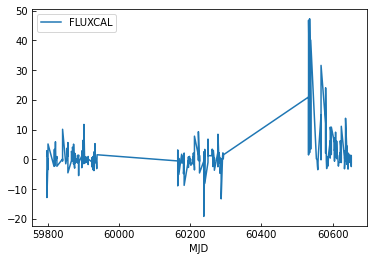

<AxesSubplot:xlabel='MJD'>

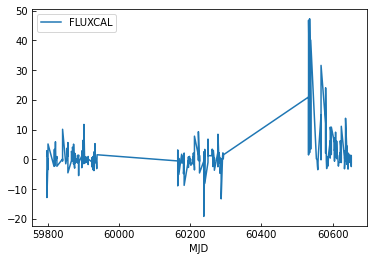

In [ ]:
lcvsforfits.loc[lcvsforfits.SNID==730].plot(x="MJD", y="FLUXCAL")

In [ ]:
def func(x):

    mjd = np.array(x["MJD"])
    flux = np.array(x["FLUXCAL"])
    argmax_flux = np.argmax(flux)
    max_flux = flux[argmax_flux]
    max_mjd = mjd[argmax_flux]

    # Find the MJD difference in each observation
    diffs = np.diff(x["MJD"], append=x["MJD"].iloc[-1])

    # Find out where these MJD differences are greater than 30 days.
    # The array `inds` will index the `mjd` or `flux` arrays.
    inds = np.where(diffs > 30)[0]

    # The `inds` array denotes the ends of seasons. Let us add indices to the
    # array so that it denotes the start and end of each season.
    for ind in inds:
        # Adding the index after the one that already appears. If `ind` denotes
        # the index for the end of one season, then `ind + 1` denotes the index
        # for the beginning of the next season.
        inds = np.append(inds, ind + 1)

    # Add 0 to the list of inds. This is the index for the start of the first
    # season.
    inds = np.append(inds, 0)

    # Here we add the the very last index for the array. This denotes the end
    # of the last season.
    inds = np.append(inds, len(mjd) - 1)

    # Now we have the indices for the beginning and end of each season.
    # Let's put them in order.
    inds = np.sort(inds)

    # Now let's reshape this array so that `inds[0]` will be the range for the
    # first season, `inds[1]` will be the range for the second season, and so on.
    inds = inds.reshape((int(inds.size / 2), 2))

    # Now we loop through each of these ranges and figure out which one
    # `max_mjd` belongs to.
    for mjd_range in inds:
        start = mjd[mjd_range[0]]
        end = mjd[mjd_range[1]]
        if start <= max_mjd <= end:
            SN_range = mjd_range
            break

    return pd.Series({"SN_range": SN_range,
                      #"argmax_flux": argmax_flux
                      "Max MJD": max_mjd, 
                      })

grouped = lcvsforfits.groupby(["SNID"]).apply(func)
grouped

,SN_range,Max MJD
SNID,,
730,"[222, 329]",60535.3177
745,"[125, 229]",60125.4094
1124,"[231, 351]",60490.2913
1598,"[231, 351]",60624.1836
1632,"[0, 121]",59752.4435
...,...,...
130639669,"[24, 69]",59952.2194
130659834,"[60, 99]",60332.2984
130678775,"[70, 117]",60391.2118


,SN_range,Max MJD
SNID,,
730,"[222, 329]",60535.3177
745,"[125, 229]",60125.4094
1124,"[231, 351]",60490.2913
1598,"[231, 351]",60624.1836
1632,"[0, 121]",59752.4435
...,...,...
130639669,"[24, 69]",59952.2194
130659834,"[60, 99]",60332.2984
130678775,"[70, 117]",60391.2118


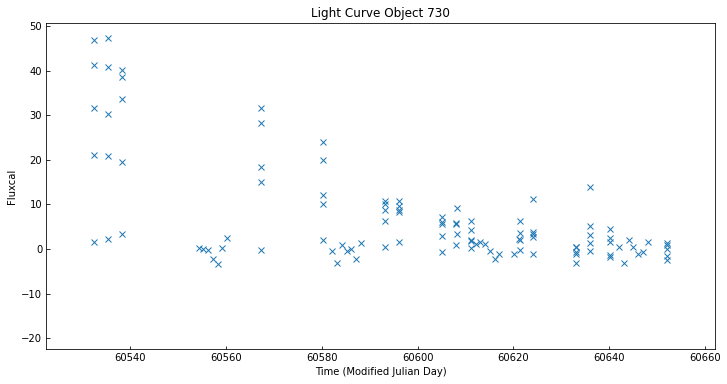

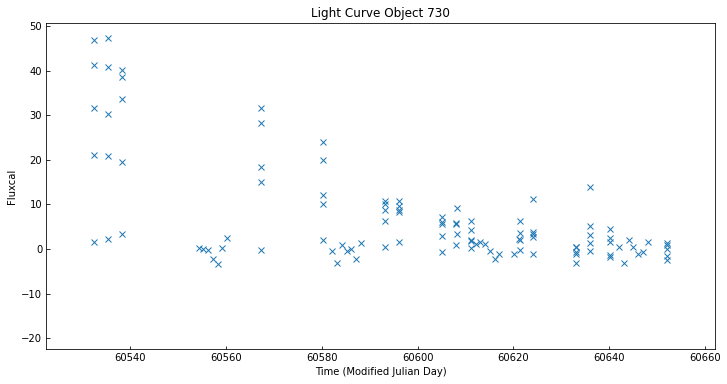

In [ ]:
import matplotlib.pyplot as pl

for i, SNID in enumerate(np.unique(lcvsforfits["SNID"])):
  if i == 1:
    break

  pl.figure(figsize=(12,6))
  pl.title("SNID")

  good_flux = lcvsforfits.loc[lcvsforfits["SNID"] == SNID]["FLUXCAL"]
  data_mjd =  lcvsforfits.loc[lcvsforfits["SNID"] == SNID]["MJD"]

  good_flux = np.array(good_flux)
  data_mjd = np.array(data_mjd)

  SN_range = grouped[grouped.index == SNID]["SN_range"].iloc[0]
  start = data_mjd[SN_range[0]] - 10
  stop = data_mjd[SN_range[1]] + 10
  #argmax_flux = grouped[grouped.index == SNID]["argmax_flux"].iloc[0]

  pl.plot(data_mjd, good_flux, marker= 'x', ls="")
  pl.xlim(start, stop)
  pl.xlabel("Time (Modified Julian Day)")
  pl.ylabel("Fluxcal")
  pl.title("Light Curve Object %.f"%SNID )
  

In [ ]:
lcvsforfits.head()

,SNID,MJD,FLT,FLUXCAL,FLUXCAL_ERR
702,730,59798.3205,2,1.177371,1.364300
703,730,59798.3281,1,2.320849,1.159247
704,730,59798.3357,3,2.939447,1.771328
705,730,59798.3466,4,2.128097,2.610659
706,730,59798.3576,5,-12.809639,5.380097


,SNID,MJD,FLT,FLUXCAL,FLUXCAL_ERR
702,730,59798.3205,2,1.177371,1.364300
703,730,59798.3281,1,2.320849,1.159247
704,730,59798.3357,3,2.939447,1.771328
705,730,59798.3466,4,2.128097,2.610659
706,730,59798.3576,5,-12.809639,5.380097


# SCONE

In [ ]:
import pandas as pd
import numpy as np
import os
import yaml
import argparse

#parser = argparse.ArgumentParser(description='create heatmaps from lightcurve data')
#parser.add_argument('--config_path', type=str, help='absolute or relative path to your yml config file, i.e. "/user/files/create_heatmaps_config.yml"')
#parser.add_argument('--lc_files', type=str)
#parser.add_argument('--metadata_files', type=str)
#parser.add_argument('--num_splits', type=int, default=0, help='number of files to split into')
#args = parser.parse_args()

#with open(args.config_path, "r") as cfgfile:
  #  config = yaml.load(cfgfile)

#for j, file in enumerate(args.lc_files):
def slit_datafile(lcdata_path, metadata_path): 
    """ Splits a light curve data file into n files for n supernova
        Input: 
        lcdata_path:(string) path to the file containing the light curve data
        metadata_path: (string) path to the file containing the metadata
        Output:
        n: (int) number of files that were saved
    """
    
    SN_TYPE_ID_MAP = snid_to_name
    metadata = pd.read_csv(metadata_path)
    lcdata = pd.read_csv(lcdata_path) 
    lcdata_ids = np.array(metadata[(metadata.true_target.isin(SN_TYPE_ID_MAP.keys()))&(metadata.ddf_bool == 1)].object_id)
    print("total unique sne: {}".format(len(lcdata_ids)))

    split_lcdata_ids = np.array_split(lcdata_ids, 145)
    #print(split_lcdata_ids)
    lcdata_rows = 0
    new_metadata_paths = []
    new_lcdata_paths = []
    for i, subarray in enumerate(split_lcdata_ids):
        metadata_split = metadata[metadata['object_id'].isin(subarray)]
        lcdata_split = lcdata[lcdata['object_id'].isin(subarray)]
        lcdata_rows += len(lcdata_split)
        assert len(metadata_split) == len(subarray)
        print("file {} has {} sne with {} lcdata rows".format(i, len(metadata_split), len(lcdata_split)))

        metadata_split.to_csv("{}_{:03d}.csv".format(metadata_path.split(".")[0], i))
        lcdata_split.to_csv("{}_{:03d}.csv".format(lcdata_path.split(".")[0], i))

        new_metadata_paths.append("{}_{:03d}.csv".format(metadata_path.split(".")[0], i)) #extra dashes for writing to config yml
        new_lcdata_paths.append("{}_{:03d}.csv".format(lcdata_path.split(".")[0], i))

        break
    print("total lcdata rows written: {}, out of total: {}".format(lcdata_rows, len(lcdata[lcdata['object_id'].isin(lcdata_ids)])))
    #assert lcdata_rows == len(lcdata[lcdata['object_id'].isin(lcdata_ids)])

   # config["metadata_paths"] += new_metadata_paths
    #config["lcdata_paths"] += new_lcdata_paths
    #config["metadata_paths"].remove(METADATA_PATH)
    #config["lcdata_paths"].remove(LCDATA_PATH)
    #with open(args.config_path, "w") as cfgfile:
     #   cfgfile.write(yaml.dump(config))

    return len(lcdata_ids), new_metadata_paths, new_lcdata_paths   

In [ ]:
slit_datafile(config['lcdata_paths'], config['metadata_paths'])

total unique sne: 1449
[array([ 730,  745, 1124, 1598, 1632, 1920, 2072, 2103, 2300, 2330]), array([2922, 3041, 3285, 3423, 3910, 4132, 4220, 4389, 4595, 4819]), array([5527, 6180, 6762, 6947, 7033, 7164, 7698, 7703, 8328, 8745]), array([ 9203,  9936, 10321, 10337, 10478, 10757, 10798, 11359, 11507,
       11770]), array([11773, 11978, 13079, 13138, 13194, 13459, 13482, 13504, 14279,
       14398]), array([14553, 14601, 14674, 14983, 15002, 15251, 15674, 15718, 15845,
       15968]), array([16463, 16496, 16802, 16983, 17285, 17366, 17370, 17515, 18029,
       18645]), array([18706, 18937, 18952, 19154, 19213, 19866, 20567, 20934, 21335,
       22184]), array([22901, 23127, 23396, 23409, 23539, 23822, 23848, 23857, 24592,
       24947]), array([24989, 25003, 25039, 25474, 25529, 25577, 25783, 26338, 27339,
       27941]), array([28220, 28301, 28636, 28843, 29088, 29252, 29416, 29420, 29576,
       29668]), array([29670, 30172, 30545, 31100, 31569, 31824, 32309, 32695, 33088,
       3317

(1449,
 ['plasticc_train_metadata_000.csv'],
 ['plasticc_train_lightcurves_000.csv'])

In [ ]:
pwd

'/content/drive/Shareddrives/FASTlab/reSCONE'

In [ ]:
ls

0_5_Ia_split_heatmaps_ids.hdf5      plasticc_train_metadata.csv.gz
output_dir/                         scone/
plasticc_train_lightcurves_000.csv  TEST00_HEAD.fits
plasticc_train_lightcurves.csv.gz   TEST00_PHOT.fits
plasticc_train_metadata_000.csv


In [ ]:
#rm plasticc_train_*.csv

In [ ]:
ls

0_5_Ia_split_heatmaps_ids.hdf5  scone/            TEST00_PHOT.fits
output_dir/                     TEST00_HEAD.fits


ls

In [ ]:


#parser = argparse.ArgumentParser(description='create heatmaps from lightcurve data')
#parser.add_argument('--config_path', type=str, help='absolute or relative path to your yml config file, i.e. "/user/files/create_heatmaps_config.yml"')

#args = parser.parse_args()
# LOAD CONFIG
#with open(args.config_path, "r") as cfgfile:
    #config = yaml.load(cfgfile)

#if "input_path" in config:
#    METADATA_PATHS = [f.path for f in os.scandir(config["input_path"]) if "HEAD.csv" in f.name and not f.name.startswith('.')]
#    LCDATA_PATHS = [path.replace("HEAD", "PHOT") for path in METADATA_PATHS]
#else:
    #METADATA_PATHS = config["metadata_paths"]
    #LCDATA_PATHS = config["lcdata_paths"]

metadata = pd.read_csv("plasticc_train_metadata.csv")
lcdata = pd.read_csv("plasticc_train_lightcurves.csv" ) 

output_path = "./" #./["heatmaps_path"]
SN_TYPE_ID_MAP = snid_to_name
IA_FRACTION = 0.5 #config["Ia_fraction"]
WANT_PEAKMJD = True #config.get("has_peakmjd", True)
#CATEGORICAL_MIN_PER_TYPE = config["categorical_min_per_type"]
#CATEGORICAL_MAX_PER_TYPE = config["categorical_max_per_type"]
CUTS = []

if not os.path.exists(output_path):
    os.makedirs(output_path, exist_ok=True)

SAVE_TO_JSON = False #config.get("save_to_json", False)
FROM_JSON = False #config.get("from_json", False)


#metadata.head()



In [ ]:
def calculate_detections(lcdata):
    snrs = lcdata['flux']/lcdata['flux_err']
    detections = np.where(snrs > 5, 1, 0)
    return detections
a = calculate_detections(lcvs)

In [ ]:
np.all(a == 0)
a.sum()

172433

In [ ]:

def calculate_peakmjd(metadata, lcdata):
    peak_mjd_calculated = []
    for snid in metadata['object_id']:
        sn_data = lcdata[lcdata['object_id'] == snid]
        #sn_data = lcdata.loc['object_id', snid]
        sn_metadata = metadata[metadata['object_id'] == snid]

        mjd = np.array(sn_data['mjd'])
        flux = np.array(sn_data['flux'])
        flux_err = np.array(sn_data['flux_err'])
        snrs = flux**2 / flux_err**2
        mask = snrs > 5
        mjd = mjd[mask]
        snrs = snrs[mask]
        if len(mjd) == 0 or len(snrs) == 0:
            print(snid)
        peak_mjd_calculated.append(np.sum(mjd * snrs) / np.sum(snrs))
    return peak_mjd_calculated


In [ ]:
peak_mjd_calculated = calculate_peakmjd(metadata, lcvs)
peak_mjd_calculated[730]

60043.476999032806

In [ ]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'ddf_bool', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target',
       'true_target', 'true_submodel', 'true_z', 'true_distmod',
       'true_lensdmu', 'true_vpec', 'true_rv', 'true_av', 'true_peakmjd',
       'libid_cadence', 'tflux_u', 'tflux_g', 'tflux_r', 'tflux_i', 'tflux_z',
       'tflux_y'],
      dtype='object')

In [ ]:
def apply_cuts(metadata, lcdata, thresholds):
    sn_ids = metadata[metadata.true_target.isin(SN_TYPE_ID_MAP.keys())]['object_id']
    lc_ids = lcdata['object_id']
    unique_lcids = np.array(np.unique(lc_ids))
    sn_ids = np.intersect1d(sn_ids,unique_lcids)
    #assert np.all(unique_lcids == sn_ids), "error!!!!!!!!!!!!!:("
    
    metadata = metadata[metadata['object_id'].isin(sn_ids)]
    if thresholds != None:
        first_detection_threshold, num_detections_threshold, snr_threshold, active_time_threshold = thresholds
    total_by_type = {}
    passed_cuts_by_type = {}
    passed_cuts = []
    not_passed_cuts = []
    no_detections = {}

    for sn_id in sn_ids:
        sn_id = int(sn_id)
        sn_metadata = metadata[metadata.object_id == sn_id]
        sn_name = SN_TYPE_ID_MAP[sn_metadata.true_target.iloc[0]]
        total_by_type[sn_name] = 1 if sn_name not in total_by_type else total_by_type[sn_name] + 1
        #if sn_name not in total_by_type:
        #    total_by_type[sn_name] = 1 
        #else:
        #   total_by_type[sn_name] += 1  #CCC orginal code did not have +=


        #sn_data = lcdata.loc['object_id', sn_id]['mjd', 'flux', 'flux_err', 'passband', 'detected_bool']
        sn_data = lcdata[lcdata['object_id'] == sn_id]
        #sn_data = sn_data.loc['mjd', 'flux', 'flux_err', 'passband', 'detected_bool']
        #print(sn_data)
        #return

        # evaluate lightcurve quality -- time between detections / non-detections
        #mask = sn_data['detected_bool'] == 1 and ~mask inverts it
        detections = np.sort(np.array(sn_data[sn_data['detected_bool'] == 1]['mjd']))
        non_detections = np.sort(np.array(sn_data[sn_data['detected_bool'] == 0]['mjd']))
        if len(detections) == 0:
            if sn_name not in no_detections:
                no_detections[sn_name] = [sn_id]
            else:
                no_detections[sn_name].append(sn_id)
            continue
        first_detection = detections[0]
        last_detection = detections[-1]
        non_detections_before = [x for x in non_detections if x < first_detection]
        non_detections_after = [x for x in non_detections if x > last_detection]
        
        time_to_first_detection = (first_detection - non_detections_before[-1]) if len(non_detections_before) > 0 else 100
        time_after_last_detection = (non_detections_after[0] - last_detection) if len(non_detections_after) > 0 else 100

        # evaluate lightcurve quality -- number of detections
        num_detections = len(detections)
        
        # evaluate lightcurve quality -- time span of detections
        active_time = last_detection - first_detection

        small_gap_before_detection = (time_to_first_detection <= first_detection_threshold)
        enough_detections = (num_detections >= num_detections_threshold)
        long_active_time = active_time >= active_time_threshold
        if not small_gap_before_detection or not enough_detections or not long_active_time:
            continue

        if thresholds == None:
            passed_cuts.append(np.string_("{}_{}".format(sn_name, sn_id)))
            continue
 
        # evaluate lightcurve quality -- cumulative s/n
        snrs = np.array(sn_data['flux'])**2 / np.array(sn_data['flux_err'])**2
        snrs = snrs[~np.isnan(snrs)] # sometimes flux err is 0
        if np.sum(snrs) < 0 or not np.isfinite(np.sum(snrs)):
            print(snrs)
        cumulative_snr = np.sqrt(np.sum(snrs))

        # define criteria
        high_snr = (cumulative_snr > snr_threshold)

        if high_snr:
            passed_cuts_by_type[sn_name] = 1 if sn_name not in passed_cuts_by_type else passed_cuts_by_type[sn_name] + 1 
            passed_cuts.append(np.string_("{}_{}".format(sn_name, sn_id)))
        else:
            not_passed_cuts.append(np.string_("{}_{}".format(sn_name, sn_id)))
    print("total: {}, passed: {}".format(total_by_type, passed_cuts_by_type))
    print("sn ids with no detections: {}".format({k:len(v) for k,v in no_detections.items()}))
    return np.array(passed_cuts)

print("RUNNING", flush=True)


RUNNING


In [ ]:
first_detection_threshold = 0
num_detections_threshold = 10
snr_threshold = 2 
active_time_threshold = 2 
thresholds = first_detection_threshold, num_detections_threshold, snr_threshold, active_time_threshold
apply_cuts(metadata, lcdata, thresholds)
           

total: {'SNII': 1193, 'SNIa': 2313, 'SNIa-91bg': 208, 'SLSN-1': 175, 'SNIbc': 484, 'SNIax': 183, 'KN': 102}, passed: {}
sn ids with no detections: {}


array([], dtype=float64)

In [ ]:
if not FROM_JSON:
    passed_cut_by_type = {}
    passed_cut_ids_with_type = np.array([])
    print(len("plasticc_train_metadata.csv"))
    for i, (metadata_path, lcdata_path) in enumerate(zip("plasticc_train_metadata.csv", "plasticc_train_lightcurves.csv")):
        print("processing file {}".format(i), flush=True)

        #metadata = pd.read_csv(metadata_path, compression="gzip") if os.path.splitext(metadata_path)[1] == ".gz" else pd.read_csv(metadata_path)
        #lcdata = pd.read_csv(lcdata_path, compression="gzip") if os.path.splitext(lcdata_path)[1] == ".gz" else pd.read_csv(lcdata_path)
        metadata = pd.read_csv("plasticc_train_metadata.csv")
        lcdata = pd.read_csv("plasticc_train_lightcurves.csv" ) 

        if 'detected_bool' not in lcdata.columns:
            detected = calculate_detections(lcdata)
            lcdata['detected_bool'] = detected
            lcdata.to_csv(lcdata_path, index=False)
        lcdata = Table.from_pandas(lcdata)
        lcdata.add_index('object_id')

        if 'true_target' not in metadata.columns:
            print("no true target")

        if 'true_peakmjd' not in metadata.columns and WANT_PEAKMJD:
            peak_mjd = calculate_peakmjd(metadata, lcdata)
            metadata['true_peakmjd'] = peak_mjd
            metadata.to_csv(metadata_path, index=False)

        passed_cut_current = apply_cuts(metadata, lcdata, CUTS) if len(CUTS) != 0 else [np.string_(f"{SN_TYPE_ID_MAP[row.true_target]}_{row.object_id}") for row in metadata[metadata.true_target.isin(SN_TYPE_ID_MAP.keys())].itertuples()]
            #[50, 5, 10, 30] thresholds = [time to first detection <= 50, num detections >= 5, snr > 10, active time >= 30 days]
        passed_cut_ids_with_type = np.concatenate((passed_cut_ids_with_type, passed_cut_current))
        for sn_id in passed_cut_current:
            sn_type, _ = str(sn_id).split("_")
            if sn_type in passed_cut_by_type:
                passed_cut_by_type[sn_type].append(str(sn_id))
            else:
                passed_cut_by_type[sn_type] = [str(sn_id)]
        if SAVE_TO_JSON:
            with open("{}/passed_cuts_{}.json".format(output_path, i), "w") as f:
                json.dump(passed_cut_by_type, f)

    print({k: len(v) for k, v in passed_cut_by_type.items()})
    if SAVE_TO_JSON:
        with open("{}/passed_cuts.json".format(output_path), "w") as f:
            json.dump(passed_cut_by_type, f)
else:
    with open("{}/passed_cuts.json".format(output_path), "r") as infile:
        passed_cut_by_type = json.load(infile)

if IA_FRACTION == None:
    print("Ia fraction none: no class balancing applied")
    heatmaps_final = [np.string_(id_[2:-1]) for k, v in passed_cut_by_type.items() for id_ in v]
elif IA_FRACTION == "categorical":
    print("Ia fraction categorical: class balancing applied")
    passed_cut_num_by_type = {k: len(v) for k, v in passed_cut_by_type.items()}
    sorted_types = [k for k, _ in sorted(passed_cut_num_by_type.items(), key=lambda item: item[1])]

    least_sn_type = sorted_types[0]
    while passed_cut_num_by_type[least_sn_type] < CATEGORICAL_MIN_PER_TYPE: # to make the total ~1000
        sorted_types.remove(least_sn_type)
        least_sn_type = sorted_types[0]
    least_sn_type_num = CATEGORICAL_MAX_PER_TYPE if passed_cut_num_by_type[least_sn_type] > CATEGORICAL_MAX_PER_TYPE else passed_cut_num_by_type[least_sn_type] # to not make too many

    print("all types: {}".format(passed_cut_num_by_type))
    print("least type: {}, num: {}".format(least_sn_type, least_sn_type_num))

    heatmaps_final = np.array([])
    for sn_type in sorted_types:
        chosen_ids = np.random.choice(passed_cut_by_type[sn_type], least_sn_type_num, replace=False)
        chosen_ids_bytes = [np.string_(sn_id[2:-1]) for sn_id in chosen_ids]
        heatmaps_final = np.concatenate((heatmaps_final, chosen_ids_bytes))
    print("number of each type: {}".format(least_sn_type_num))
    print("total heatmaps: {:,}, total unique heatmaps: {:,}".format(len(heatmaps_final), len(np.unique(heatmaps_final))))
else:
    print(f"Ia fraction {IA_FRACTION}: class balancing applied")
    Ia_heatmaps = np.unique([np.string_(v[2:-1]) for v in passed_cut_by_type.get("b'SNIa", [])])
    non_Ia_heatmaps = np.array([np.string_(snid[2:-1]) for k,v in passed_cut_by_type.items() if k != "b'SNIa" for snid in v]).flatten()

    total_heatmap_count = len(Ia_heatmaps) + len(non_Ia_heatmaps)
    print("total passed cut heatmaps: {}".format(total_heatmap_count))
    current_Ia_fraction = float(len(Ia_heatmaps)) / total_heatmap_count
    if current_Ia_fraction != IA_FRACTION:
        fraction = IA_FRACTION if IA_FRACTION < current_Ia_fraction else 1-IA_FRACTION
        heatmaps_to_change = Ia_heatmaps if IA_FRACTION < current_Ia_fraction else non_Ia_heatmaps
        unchanged_heatmaps = non_Ia_heatmaps if IA_FRACTION < current_Ia_fraction else Ia_heatmaps

        num_to_remove = (len(heatmaps_to_change) - fraction*total_heatmap_count)/(1 - fraction)
        num_to_keep = int(len(heatmaps_to_change) - num_to_remove)
        heatmaps_final = np.concatenate((unchanged_heatmaps, np.random.choice(heatmaps_to_change, num_to_keep, replace=False)))

        Ia_heatmaps = [id for id in heatmaps_final if b"Ia_" in id]
        non_Ia_heatmaps = [id for id in heatmaps_final if b"Ia_" not in id]
    else:
        heatmaps_final = np.concatenate((Ia_heatmaps, non_Ia_heatmaps))
    print("number of type Ia heatmaps: {:,}, number of non-Ia heatmaps: {:,}".format(len(Ia_heatmaps), len(non_Ia_heatmaps)))
    print("total heatmaps: {:,}, total unique heatmaps: {:,}".format(len(heatmaps_final), len(np.unique(heatmaps_final))))

ids_file_path = "{}/{}_Ia_split_heatmaps_ids.hdf5".format(output_path, str(IA_FRACTION).replace(".", "_"))
f = h5py.File(ids_file_path, "w")
f.create_dataset("names", data=heatmaps_final)
f.close()

print("data cuts completed successfully!")
print(f"ids file written at {ids_file_path}")

27
processing file 0
processing file 1
processing file 2
processing file 3
processing file 4
processing file 5
processing file 6
processing file 7
processing file 8
processing file 9
processing file 10
processing file 11
processing file 12
processing file 13
processing file 14
processing file 15
processing file 16
processing file 17
processing file 18
processing file 19
processing file 20
processing file 21
processing file 22
processing file 23
processing file 24
processing file 25
processing file 26
{"b'SNII": 32211, "b'SNIa": 62451, "b'SNIa-91bg": 5616, "b'SLSN-1": 4725, "b'SNIbc": 13068, "b'SNIax": 4941, "b'KN": 2754}
Ia fraction 0.5: class balancing applied
total passed cut heatmaps: 65628
number of type Ia heatmaps: 2,313, number of non-Ia heatmaps: 2,313
total heatmaps: 4,626, total unique heatmaps: 3,819
data cuts completed successfully!
ids file written at .//0_5_Ia_split_heatmaps_ids.hdf5


# Create Heatmaps

## Helpers

In [ ]:
import tensorflow as tf
from scipy.optimize import minimize
from functools import partial
#import george
#from george import kernels
from astropy.table import Table
from astropy.io import fits
import yaml
import os

def get_band_to_wave(survey):
    if survey == 'NGRST' or survey == 'WFIRST':
        return {
            "R": 6296.73,
            "Z": 8744.77,
            "Y": 10653.88,
            "J": 12975.72,
            "H": 15848.21,
            "F": 18475.41
        }
    if survey == 'LSST' or survey == 'DES':
        return {
            "u": 3670.69,
            "g": 4826.85,
            "r": 6223.24,
            "i": 7545.98,
            "z": 8590.90,
            "Y": 9710.28
        }
    raise ValueError(f"survey {survey} not registered! contact helenqu@sas.upenn.edu")


In [ ]:
def read_fits(fname, sn_type_id_to_name, survey_from_config, drop_separators=False):
    """Load SNANA formatted data and cast it to a PANDAS dataframe
    Args:
        fname (str): path + name to PHOT.FITS file
        drop_separators (Boolean): if -777 are to be dropped
    Returns:
        (astropy.table.Table) dataframe from PHOT.FITS file (with ID)
        (pandas.DataFrame) dataframe from HEAD.FITS file
    """

    # load photometry
    lcdata = Table.read(fname, format='fits')

    if len(lcdata) == 0:
        print(f"{fname} empty!!")
        return lcdata, lcdata
    # failsafe
    if lcdata['MJD'][-1] == -777.0:
        lcdata.remove_row(-1)
    if lcdata['MJD'][0] == -777.0:
        lcdata.remove_row(-1)

    # load header
    metadata_hdu = fits.open(fname.replace("PHOT", "HEAD"))
    survey = survey_from_config if survey_from_config else metadata_hdu[0].header["SURVEY"]

    header = Table.read(fname.replace("PHOT", "HEAD"), format="fits")
    df_header = header.to_pandas()
    df_header["SNID"] = df_header["SNID"].astype(np.int32)

    # add SNID to phot for skimming
    arr_ID = np.zeros(len(lcdata), dtype=np.int32)
    # New light curves are identified by MJD == -777.0
    arr_idx = np.where(lcdata["MJD"] == -777.0)[0]
    arr_idx = np.hstack((np.array([0]), arr_idx, np.array([len(lcdata)])))
    # Fill in arr_ID
    for counter in range(1, len(arr_idx)):
        start, end = arr_idx[counter - 1], arr_idx[counter]
        # index starts at zero
        arr_ID[start:end] = df_header.SNID.iloc[counter - 1]
    lcdata["SNID"] = arr_ID

    if drop_separators:
        lcdata = lcdata[lcdata['MJD'] != -777.000]

    df_header = df_header[["SNID", "SNTYPE", "PEAKMJD", "REDSHIFT_FINAL", "REDSHIFT_FINAL_ERR", "MWEBV"]]
    df_header = df_header.rename(columns={"SNID":"object_id", "SNTYPE": "true_target", "PEAKMJD": "true_peakmjd", "REDSHIFT_FINAL": "true_z", "REDSHIFT_FINAL_ERR": "true_z_err", "MWEBV": "mwebv"})
    df_header.replace({"true_target": sn_type_id_to_name}, inplace=True)
    
    band_colname = "FLT" if "FLT" in lcdata.columns else "BAND" # check for filter column name from different versions of SNANA
    lcdata = lcdata[["SNID", "MJD", band_colname, "FLUXCAL", "FLUXCALERR"]]
    rename_columns = {"SNID":"object_id", "MJD": "mjd", band_colname: "passband", "FLUXCAL": "flux", "FLUXCALERR": "flux_err"}
    for old_colname, new_colname in rename_columns.items():
        lcdata.rename_column(old_colname, new_colname)

    return df_header, lcdata, survey

In [ ]:
survey_from_config = 'LSST'
drop_separators = False
#/content/drive/Shareddrives/FASTlab/reSCONE/TEST00_PHOT.fits 
read_fits("TEST00_PHOT.fits", snid_to_name, survey_from_config, drop_separators)

ValueError: ignored

In [ ]:
def build_gp(guess_length_scale, sn_data, bands):
    """This is  all  taken from Avacado -
    see https://github.com/kboone/avocado/blob/master/avocado/astronomical_object.py
    In this a 2D matern kernal is used  to  model the transient. The kernel
    width in the wavelength direction is fixed. We fit for the kernel width
    in the time direction"""

    mjdall = sn_data['mjd']
    fluxall = sn_data['flux']
    flux_errall = sn_data['flux_err']

    #Want to compute the scale factor that we will use...
    signal_to_noises = np.abs(fluxall) / np.sqrt(flux_errall ** 2 + (1e-2 * np.max(fluxall)) ** 2)
    scale = np.abs(fluxall[np.argmax(signal_to_noises)])

    kernel = (0.5 * scale) ** 2 * kernels.Matern32Kernel([guess_length_scale ** 2, 6000 ** 2], ndim=2)

    gp = george.GP(kernel)
    guess_parameters = gp.get_parameter_vector()

    x_data = np.vstack([mjdall, bands]).T
    gp.compute(x_data, flux_errall)

    def neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.log_likelihood(fluxall)

    def grad_neg_ln_like(p):
        gp.set_parameter_vector(p)
        return -gp.grad_log_likelihood(fluxall)

    bounds = [(0, np.log(1000 ** 2))]
    bounds = [(guess_parameters[0] - 10, guess_parameters[0] + 10)] + bounds + [(None, None)]
    # check if result with/without bounds are the same

    try:
        fit_result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like, bounds=bounds)
        gp.set_parameter_vector(fit_result.x)
        gaussian_process = partial(gp.predict, fluxall)
    except ValueError:
        return None

    return gaussian_process



In [ ]:
def image_example(image_string, label, id, z, z_err):
    def _bytes_feature(value):
        """Returns a bytes_list from a string / byte."""
        if isinstance(value, type(tf.constant(0))):
            value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
        return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

    def _int64_feature(value):
        """Returns an int64_list from a bool / enum / int / uint."""
        return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

    def _float_feature(value):
      """Returns a float_list from a float / double."""
      return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

    feature = {
        'id': _int64_feature(id),
        'label': _int64_feature(label),
        'z': _float_feature(z),
	'z_err': _float_feature(z_err),
        'image_raw': _bytes_feature(image_string),
    }

    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()



In [ ]:
def get_extinction(ebv, wave):
    avu = 3.1*ebv

    x = 10000.0/wave # inverse wavelength in microns   - creates a numpy array
    xv = 1.82
    y = x - 1.82 #another numpy array

    #Creating empty arrays in which to store the final data
    aval=[]
    bval=[]

    #Now need to loop through each indavidual wavlength value
    for i in range(len(x)):

        if (x[i] >= 0.3 and x[i] < 1.1): # For IR data
            a =  0.574*pow(x[i],1.61)
            b = -0.527*pow(x[i],1.61)
            aval.append(a)
            bval.append(b)

        elif (x[i] >= 1.1 and x[i] < 3.3): #For Optical/NIR data
            a = 1. + 0.17699*y[i] - 0.50447*np.power(y[i],2) - 0.02427*np.power(y[i],3) + 0.72085*np.power(y[i],4) + 0.01979*np.power(y[i],5) - 0.77530*np.power(y[i],6) + 0.32999*np.power(y[i],7)
            b = 1.41338*y[i] + 2.28305*np.power(y[i],2) + 1.07233*np.power(y[i],3) - 5.38434*np.power(y[i],4) - 0.62251*np.power(y[i],5) + 5.30260*np.power(y[i],6) - 2.09002*np.power(y[i],7)
            aval.append(a)
            bval.append(b)

        elif (x[i] >= 3.3 and x[i] < 8.0): # For UV data
            if (x[i] >= 5.9):
                fa = -0.04473*np.power(x[i]-5.9,2) - 0.009779*np.power(x[i]-5.9,3)
                fb =  0.21300*np.power(x[i]-5.9,2) + 0.120700*np.power(x[i]-5.9,3)
            else:
                fa = fb = 0.0

            a =  1.752 - 0.316*x[i] - 0.104/(np.power(x[i]-4.67,2) + 0.341) + fa
            b = -3.090 + 1.825*x[i] + 1.206/(np.power(x[i]-4.62,2) + 0.263) + fb

            aval.append(a)
            bval.append(b)

        elif (x[i] >= 8.0 and x[i] <= 10.0):  # For Far-UV data
            a = -1.073 - 0.628*(x[i]-8.) + 0.137*np.power(x[i]-8.,2) - 0.070*np.power(x[i]-8.,3)
            b = 13.670 + 4.257*(x[i]-8.) - 0.420*np.power(x[i]-8.,2) + 0.374*np.power(x[i]-8.,3)

            aval.append(a)
            bval.append(b)
        else:
            a = b = 0.0

            aval.append(a)
            bval.append(b)

    aval = np.array(aval)
    bval = np.array(bval)

    RV = 3.1
    extinct = avu*(aval + bval/RV)

    return extinct

## Base


In [ ]:

import h5py
import time
import abc
#from create_heatmaps.helpers import build_gp, image_example, get_extinction, read_fits, get_band_to_wave

class CreateHeatmapsBase(abc.ABC):
    def __init__(self, config, index):
        self.index = index

        self.survey = config.get("survey", None)

        # file paths 
        self.metadata_path = config["metadata_paths"][index]
        self.lcdata_path = config["lcdata_paths"][index]
        self.output_path = config["heatmaps_path"]
        self.finished_filenames_path = os.path.join(self.output_path, "finished_filenames.csv")

        # heatmap parameters / metadata
        self.wavelength_bins = config["num_wavelength_bins"]
        self.mjd_bins = config["num_mjd_bins"]
        self.has_peakmjd = config.get("has_peakmjd", True)

        # heatmap labeling
        self.categorical = config["categorical"]
        self.types = config["types"]
        self.sn_type_id_to_name = config["sn_type_id_to_name"] # SNANA type ID to type name (i.e. 42 -> SNII)
        self.type_to_int_label = {type: 0 if type != "SNIa" else 1 for type in self.types} if not self.categorical else {v:i for i,v in enumerate(sorted(self.types))} # int label for classification
        print(f"type to int label: {self.type_to_int_label}")

        # restricting number of heatmaps that are made
        self.ids_path = config.get("ids_path", None)

        self.load_data()

    def load_data(self):
        print(f'Processing file: {self.lcdata_path}')

        if os.path.exists(self.finished_filenames_path):
            finished_filenames = pd.read_csv(self.finished_filenames_path)
            if os.path.basename(self.metadata_path) in finished_filenames:
                print("file has already been processed, exiting")
                sys.exit(0)
        
        self.metadata, self.lcdata, survey = read_fits(self.lcdata_path, self.sn_type_id_to_name, self.survey)
        metadata_ids = self.metadata[self.metadata.true_target.isin(self.types)].object_id

        self.lcdata.add_index('object_id')
        self.lcdata['passband'] = [flt.strip() for flt in self.lcdata['passband']]
        self.lcdata_ids = np.intersect1d(self.lcdata['object_id'], metadata_ids)

        # survey info
        self.band_to_wave = get_band_to_wave(survey)

        if self.ids_path:
            ids_file = h5py.File(self.ids_path, "r")
            self.ids = ids_file["ids"][()] # turn this into a numpy array
            print(f"example id {self.ids[0]}")
            ids_file.close()
        self.has_ids = self.ids_path and self.ids is not None
        self.ids_for_current_file = np.intersect1d(self.lcdata_ids, self.ids) if self.has_ids else self.lcdata_ids
        print(f"job {self.index}: {'found' if self.has_ids else 'no'} ids, expect {len(self.ids_for_current_file)}/{len(self.lcdata_ids)} heatmaps for this file", flush=True)

    @abc.abstractmethod
    def run(self):
        pass

    @staticmethod
    @abc.abstractmethod
    def _calculate_mjd_range(sn_metadata, sn_data, mjd_minmax, has_peakmjd):
        pass

    def create_heatmaps(self, output_paths, mjd_minmaxes, fit_on_full_lc=True):
        #TODO: infer this from config file rather than making the subclasses pass it in
        self.fit_on_full_lc = fit_on_full_lc
            
        for output_path, mjd_minmax in zip(output_paths, mjd_minmaxes):
            if not os.path.exists(output_path):
                os.makedirs(output_path)
            print("writing to {}".format(output_path), flush=True)

            self.done_by_type = {}
            self.removed_by_type = {}
            self.done_ids = []
            
            timings = []
            start = time.time()
            with tf.io.TFRecordWriter("{}/heatmaps_{}.tfrecord".format(output_path, self.index)) as writer:
                for i, sn_id in enumerate(self.ids_for_current_file):
                    if i % 1000 == 0:
                        print("job {}: processing {} of {}".format(self.index, i, len(self.ids_for_current_file)), flush=True)
                        if i == 1000:
                            time_to_1000 = time.time() - start
                            print(f"took {time_to_1000} sec for 1000 heatmaps; expected total time: {(len(self.ids_for_current_file)/1000)*time_to_1000} sec")
                    
                    sn_name, *sn_data = self._get_sn_data(sn_id, mjd_minmax)
                    if sn_data[0] is None:
                        self._remove(sn_name)
                        continue
                    sn_metadata, sn_lcdata, mjd_range = sn_data
                    wave = [self.band_to_wave[elem] for elem in sn_lcdata['passband']]
                
                    gp = build_gp(20, sn_lcdata, wave)
                    if gp == None:
                        self._remove(sn_name)
                        continue

                    milkyway_ebv = sn_metadata['mwebv'].iloc[0]

                    predictions, prediction_errs = self._get_predictions_heatmap(gp, mjd_range, milkyway_ebv)
                    heatmap = np.dstack((predictions, prediction_errs))

                    if sn_name not in self.type_to_int_label:
                        if self.categorical:
                            print(f"{sn_name} not in SN_TYPE_ID_MAP?? stopping now")
                            break
                        self.type_to_int_label[sn_name] = 1 if sn_name == "SNIa" or sn_name == "Ia" else 0

                    z = sn_metadata['true_z'].iloc[0]
                    z_err = sn_metadata['true_z_err'].iloc[0]
                    
                    writer.write(image_example(heatmap.flatten().tobytes(), self.type_to_int_label[sn_name], sn_id, z, z_err))
                    self._done(sn_name, sn_id)

            if not os.path.exists(self.finished_filenames_path):
                pd.DataFrame({"filenames": [os.path.basename(self.metadata_path)]}).to_csv(self.finished_filenames_path, index=False)
            else:
                finished_filenames = pd.read_csv(self.finished_filenames_path)
                finished_filenames.append({"filenames": os.path.basename(self.metadata_path)}, ignore_index=True).to_csv(self.finished_filenames_path, index=False)

            with open("{}/done.log".format(output_path), "a+") as f:
                f.write("####### JOB {} REPORT #######\n".format(self.index))
                f.write("type name mapping to integer label used for classification: {}".format(self.type_to_int_label))
                f.write(str(self.done_by_type).replace("'", "") + "\n")
                total = 0
                for v in self.done_by_type.values():
                    total += v
                f.write("done: {}\n".format(total))
                f.write("removed: {}\n".format(str(self.removed_by_type).replace("'", "")))

    # HELPER FUNCTIONS
    def _get_sn_data(self, sn_id, mjd_minmax):
        #TODO: find a better thing to early return
        sn_metadata = self.metadata[self.metadata.object_id == sn_id]
        if sn_metadata.empty:
            print("sn metadata empty")
            return None, None

        sn_name = sn_metadata.true_target.iloc[0]
        already_done = sn_id in self.done_ids
        if already_done:
            return sn_name, None

        sn_lcdata = self.lcdata.loc['object_id', sn_id]['mjd', 'flux', 'flux_err', 'passband']

        expected_filters = list(self.band_to_wave.keys())
        sn_lcdata = sn_lcdata[np.isin(sn_lcdata['passband'], expected_filters)] 
        if len(sn_lcdata) == 0: 
            print("expected filters filtering not working") 
            return sn_name, None

        mjd_range = self._calculate_mjd_range(sn_metadata, sn_lcdata, mjd_minmax, self.has_peakmjd)
        if not mjd_range:
            print("mjd range is none") 
            return sn_name, None

        if not self.fit_on_full_lc:
            mjds = sn_lcdata['mjd']
            mask = np.logical_and(mjds >= mjd_range[0], mjds <= mjd_range[1])
            if not mask.any(): # if all false
                print("empty sn data after mjd mask", mjd_range, np.min(mjds), np.max(mjds))
                return sn_name, None
            sn_lcdata = sn_lcdata[mask]

        sn_lcdata.add_row([min(sn_lcdata['mjd'])-100, 0, 0, expected_filters[2]])
        sn_lcdata.add_row([max(sn_lcdata['mjd'])+100, 0, 0, expected_filters[2]])

        return sn_name, sn_metadata, sn_lcdata, mjd_range

    def _remove(self, sn_name):
        self.removed_by_type[sn_name] = 1 if sn_name not in self.removed_by_type else self.removed_by_type[sn_name] + 1

    def _done(self, sn_name, sn_id):
        self.done_ids.append(sn_id)
        self.done_by_type[sn_name] = 1 if sn_name not in self.done_by_type else self.done_by_type[sn_name] + 1

    def _get_predictions_heatmap(self, gp, mjd_range, milkyway_ebv):
        times = np.linspace(mjd_range[0], mjd_range[1], self.mjd_bins)

        wavelengths = np.linspace(3000.0, 10100.0, self.wavelength_bins)
        ext = get_extinction(milkyway_ebv, wavelengths)
        ext = np.tile(np.expand_dims(ext, axis=1), len(times))
        time_wavelength_grid = np.transpose([np.tile(times, len(wavelengths)), np.repeat(wavelengths, len(times))])
 
        predictions, prediction_vars = gp(time_wavelength_grid, return_var=True)
        ext_corrected_predictions = np.array(predictions).reshape(32, 180) + ext
        prediction_uncertainties = np.sqrt(prediction_vars).reshape(32, 180)

        return ext_corrected_predictions, prediction_uncertainties

## Heatmaps Types

In [ ]:
import numpy as np
import os
#from create_heatmaps.base import CreateHeatmapsBase
import json
import pandas as pd

class CreateHeatmapsFull(CreateHeatmapsBase):
    def run(self):
        self.create_heatmaps([self.output_path], [[-30, 150]])

    @staticmethod
    def _calculate_mjd_range(sn_metadata, sn_data, mjd_minmax, has_peakmjd):
        mjd_min, mjd_max = mjd_minmax
        if not has_peakmjd:
            mjd_range = [np.min(sn_data['mjd']), np.max(sn_data['mjd'])]
            return mjd_range
        peak_mjd = sn_metadata['true_peakmjd'].iloc[0]
        mjd_range = [peak_mjd+mjd_min, peak_mjd+mjd_max]

        return mjd_range

class CreateHeatmapsEarlyBase(CreateHeatmapsBase):
    def run(self):
        raise NotImplementedError

    @staticmethod
    def _calculate_mjd_range(sn_metadata, sn_data, mjd_minmax, has_peakmjd):
        raise NotImplementedError

    @staticmethod
    def _calculate_trigger(sn_metadata, sn_data):
        sn_data.sort("mjd")
        snrs_by_mjd = [[mjd, flux/flux_err] for mjd, flux, flux_err in sn_data.iterrows('mjd', 'flux', 'flux_err')]
        detections = [[mjd,snr] for mjd, snr in snrs_by_mjd if snr > 5]
        if len(detections) < 2:
            return 
        first_detection_mjd = detections[0][0]
        # find first detection that occurred more than 1 day after initial detection
        detections = [detection for detection in detections if detection[0] > 1+first_detection_mjd]
        if len(detections) == 0:
            return
        trigger_mjd = detections[0][0]

        return trigger_mjd

class CreateHeatmapsEarlyMixed(CreateHeatmapsEarlyBase):
    def run(self):
        print("running early mixed")
        self.create_heatmaps([self.output_path], [[-20, np.arange(0,51)]], fit_on_full_lc=False)
    
    @staticmethod
    def _calculate_mjd_range(sn_metadata, sn_data, mjd_minmax, has_peakmjd):
        mjd_min, mjd_max = mjd_minmax
        trigger = CreateHeatmapsEarlyMixed._calculate_trigger(sn_metadata, sn_data)
        if not trigger:
            return
        mjd_max = np.random.choice(mjd_max)
        return [trigger+mjd_min, trigger+mjd_max],mjd_max #TODO: change backto one return val 7/16

class CreateHeatmapsEarly(CreateHeatmapsEarlyBase):
    def run(self):
        days_after_trigger = [150]
        days_before_trigger = -30
        output_paths = [f"{self.output_path}/{days_before_trigger}x{i}_trigger_32x180" for i in days_after_trigger]
        mjd_ranges = [[days_before_trigger, i] for i in days_after_trigger]

        self.create_heatmaps(output_paths, mjd_ranges, fit_on_full_lc=False)
    
    @staticmethod
    def _calculate_mjd_range(sn_metadata, sn_data, mjd_minmax, has_peakmjd):
        mjd_min, mjd_max = mjd_minmax
        trigger = CreateHeatmapsEarly._calculate_trigger(sn_metadata, sn_data)
        if not trigger:
            return
        return [trigger+mjd_min, trigger+mjd_max]

class SaveTriggerToCSV(CreateHeatmapsEarlyBase):
    def run(self):
        OUTPUT_PATH = os.path.dirname(self.metadata_path)
        print("writing to {}".format(OUTPUT_PATH))
        self.metadata["1season_peakmjd"] = np.zeros(len(self.metadata))
        self.metadata["3season_peakmjd"] = np.zeros(len(self.metadata))

        for i, sn_id in enumerate(self.lcdata_ids):
            if i % 1000 == 0:
                print(f"processing {i} of {len(self.lcdata_ids)}")
            sn_metadata = self.metadata[self.metadata.object_id == sn_id]
            sn_name = self.sn_type_id_map[sn_metadata.true_target.iloc[0]]
            sn_lcdata = self.lcdata.loc['object_id', sn_id]['mjd', 'flux', 'flux_err', 'passband']

            sn_mjd = sorted(sn_lcdata['mjd'], reverse=True)
            trigger = sn_metadata.trigger_mjd.values[0]
            if np.isnan(trigger):
                continue
            sn_mjd_trigger_idx = np.where([round(mjd, 3) for mjd in sn_mjd] == round(trigger, 3))[0]
            if len(sn_mjd_trigger_idx) == 0:
                print(trigger)
                print([round(mjd, 3) for mjd in sn_mjd])
                break
            sn_mjd_trigger_idx = sn_mjd_trigger_idx[0]

            season_start_idx = -1
            for i in range(sn_mjd_trigger_idx, len(sn_mjd)-1):
                if i == 0:
                    print(sn_mjd[i] - sn_mjd[i+1])
                if sn_mjd[i] - sn_mjd[i+1] > 50:
                    season_start_idx = i
                    break
            season_start = sn_mjd[season_start_idx]

            sn_mjd = sorted(sn_lcdata['mjd'])
            sn_mjd_trigger_idx = np.where([round(mjd, 3) for mjd in sn_mjd] == round(trigger, 3))[0][0]
            season_end_idx = -1
            for i in range(sn_mjd_trigger_idx, len(sn_mjd)-1):
                if sn_mjd[i] - sn_mjd[i+1] < -100:
                    season_end_idx = i
                    break
            season_end = sn_mjd[season_end_idx]

            sn_data = sn_lcdata[np.logical_and(sn_lcdata["mjd"] >= season_start, sn_lcdata["mjd"] <= season_end)]
            mjd = np.array(sn_data['mjd'])
            flux = np.array(sn_data['flux'])
            flux_err = np.array(sn_data['flux_err'])
            snrs = flux**2 / flux_err**2
            mask = snrs > 5
            mjd = mjd[mask]
            snrs = snrs[mask]
            peak_mjd_oneseason = np.sum(mjd * snrs) / np.sum(snrs)
            self.metadata.loc[self.metadata.object_id == sn_id, "1season_peakmjd"] = peak_mjd_oneseason

            mjd = np.array(sn_lcdata['mjd'])
            flux = np.array(sn_lcdata['flux'])
            flux_err = np.array(sn_lcdata['flux_err'])
            snrs = flux**2 / flux_err**2
            mask = snrs > 5
            mjd = mjd[mask]
            snrs = snrs[mask]
            if len(mjd) == 0 or len(snrs) == 0:
                print(snid)
            peak_mjd_calculated = np.sum(mjd * snrs) / np.sum(snrs)
            self.metadata.loc[self.metadata.object_id == sn_id, "3season_peakmjd"] = peak_mjd_calculated
        self.metadata.to_csv(os.path.join(OUTPUT_PATH, os.path.basename(self.metadata_path)), index=False)

class MagById(CreateHeatmapsBase):
    @staticmethod
    def _calculate_mjd_range(sn_metadata, sn_data, mjd_minmax, has_peakmjd):
        raise NotImplementedError
    def run(self):
        def _calculate_detections(sn_data):
            sn_data.sort("mjd")
            snrs_by_mjd = [[mjd, flux/flux_err] for mjd, flux, flux_err in sn_data.iterrows('mjd', 'flux', 'flux_err')]
            # snrs_by_mjd = {sn_data.iloc[idx]['mjd']:sn_data.iloc[idx]['flux']/sn_data.iloc[idx]['flux_err'] for idx in range(len(sn_data))}
            detections = [[mjd,snr] for mjd, snr in snrs_by_mjd if snr > 5]
            if len(detections) < 2:
                return 
            return [detection[0] for detection in detections], [detection[1] for detection in detections]

        def _calculate_trigger(sn_data):
            detections = _calculate_detections(sn_data)
            if not detections:
                return
            detections_mjd = detections[0]
            first_detection_mjd = detections_mjd[0]
            # find first detection that occurred more than 1 day after initial detection
            detections_mjd = [detection for detection in detections_mjd if detection > 1+first_detection_mjd]
            if len(detections_mjd) == 0:
                return
            trigger_mjd = detections_mjd[0]

            return trigger_mjd

        mag_by_id = {0: [], 5: [], 15: []}
        for i, sn_id in enumerate(self.lcdata_ids):
            if i % 1000 == 0:
                print(f"processing {i} of {len(self.lcdata_ids)}")
            sn_metadata = self.metadata[self.metadata.object_id == sn_id]
            sn_name = self.sn_type_id_map[sn_metadata.true_target.iloc[0]]
            sn_lcdata = self.lcdata.loc['object_id', sn_id]['mjd', 'flux', 'flux_err', 'passband']

            for mjdmax in mag_by_id.keys():
                trigger_mjd = _calculate_trigger(sn_lcdata)
                detections = _calculate_detections(sn_lcdata)
                if not detections or not trigger_mjd:
                    continue
                mjd_range = [trigger_mjd-20, trigger_mjd+mjdmax]

                mjds = sn_lcdata['mjd']
                mask = np.logical_and(mjds >= mjd_range[0], mjds <= mjd_range[1])
                if not mask.any(): # if all false
                    print("empty sn data after mjd mask", mjd_range, np.min(mjds), np.max(mjds))
                    continue
                sn_lcdata_included = sn_lcdata[mask]
                sn_lcdata_r = sn_lcdata_included[sn_lcdata_included['passband'] == 1]
                if len(sn_lcdata_r) == 0:
                    continue
                last_r_flux = sn_lcdata_r['flux'][-1]
                last_r_mag = 27.5 - 2.5*np.log10(last_r_flux)
                if last_r_mag <= 20:
                    mag_by_id[int(mjdmax)].append(int(sn_id))

        with open(os.path.join(self.output_path, f"mag_over_20_ids_{self.index}.json"), "w+") as outfile:
            json.dump(mag_by_id, outfile)

class SaveFirstDetectionToCSV(CreateHeatmapsEarlyBase):
    @staticmethod
    def _calculate_first_detection(sn_metadata, sn_data):
        sn_data.sort("mjd")
        snrs_by_mjd = [[mjd, flux/flux_err] for mjd, flux, flux_err in sn_data.iterrows('mjd', 'flux', 'flux_err')]
        detections = [[mjd,snr] for mjd, snr in snrs_by_mjd if snr > 5]
        if len(detections) < 2:
            return 
        first_detection_mjd = detections[0][0]

        return first_detection_mjd

    def run(self):
        OUTPUT_PATH = os.path.dirname(self.metadata_path)
        print("writing to {}".format(OUTPUT_PATH))

        data = []
        for i, sn_id in enumerate(self.lcdata_ids):
            if i % 1000 == 0:
                print(f"processing {i} of {len(self.lcdata_ids)}")
            sn_metadata = self.metadata[self.metadata.object_id == sn_id]
            sn_name = self.sn_type_id_map[sn_metadata.true_target.iloc[0]]
            sn_lcdata = self.lcdata.loc['object_id', sn_id]['mjd', 'flux', 'flux_err', 'passband']

            sn_mjd = sorted(sn_lcdata['mjd'], reverse=True)
            trigger = sn_metadata.trigger_mjd.values[0]
            first_detection = SaveFirstDetectionToCSV._calculate_first_detection(sn_metadata, sn_lcdata)
            if np.isnan(trigger) or np.isnan(first_detection):
                continue
            data.append([sn_id, first_detection, trigger])

        pd.DataFrame(data, columns=["snid", "first_detection_mjd", "trigger_mjd"]).to_csv(os.path.join(OUTPUT_PATH, os.path.basename(self.metadata_path)), index=False)


## Manager

In [ ]:

class CreateHeatmapsManager():
    def run(self, config, index):
        create_heatmaps_object = None
        if config.get("early_lightcurves_mixed", False):
            create_heatmaps_object = CreateHeatmapsEarlyMixed(config, index)
        elif config.get("early_lightcurves", False):
            create_heatmaps_object = CreateHeatmapsEarly(config, index)
        else:
            create_heatmaps_object = CreateHeatmapsFull(config, index)
        create_heatmaps_object.run()

## Run


In [ ]:
import os
import yaml
import argparse
import subprocess
from astropy.table import Table #!
import numpy as np
import h5py

# TODO: how to create system-agnostic sbatch header
#SBATCH --cpus-per-task 2
SBATCH_HEADER = """#!/bin/bash
#SBATCH -C haswell
#SBATCH --qos={qos}
#SBATCH --job-name={job_name}
#SBATCH --nodes 1
#SBATCH --ntasks={ntasks}
#SBATCH --time=10:00:00
#SBATCH --output={log_path}
cd {scone_path}
python create_heatmaps_job.py --config_path {config_path} --start {start} --end {end}"""

PARENT_DIR_PATH = "." #os.path.dirname(os.path.abspath(__file__))
SCONE_PATH = os.path.dirname(PARENT_DIR_PATH) #TODO: this directory structure might change

# HELPER FUNCTIONS
def write_config(config, config_path):
    with open(config_path, "w") as f:
        f.write(yaml.dump(config))

def load_config(config_path):
    with open(config_path, "r") as cfgfile:
        config = yaml.load(cfgfile, Loader=yaml.Loader)
    return config

def load_configs(config_path):
    config = load_config(config_path)
    gentype_config = load_config(os.path.join(PARENT_DIR_PATH, "default_gentype_to_typename.yml"))["gentype_to_typename"]
    return config, gentype_config

# count number of objects per sntype
def get_ids_by_sn_name(metadata_paths, sn_type_id_to_name):
    sntype_to_abundance = {}
    #print(metadata_paths)
    for metadata_path in metadata_paths:
        #print(metadata_path)
        metadata = Table.read(metadata_path, format='fits')
        sntypes = np.unique(metadata['SNTYPE'])
        for sntype in sntypes:
            sn_name = sn_type_id_to_name[sntype]
            current_value = sntype_to_abundance.get(sn_name, np.array([]))
            sntype_to_abundance[sn_name] = np.concatenate((current_value, metadata[metadata['SNTYPE'] == sntype]['SNID'].astype(np.int32)))
    return sntype_to_abundance

# do class balancing
def class_balance(categorical, abundances, max_per_type, ids_by_sn_name, ids_path):
    if categorical: 
        num_to_choose = min(abundances.values())
        ids_to_choose_from = list(ids_by_sn_name.values())
    else: 
        num_Ias = abundances["SNIa"]
        num_non_Ias = sum(abundances.values()) - num_Ias
        num_to_choose = min(num_Ias, num_non_Ias)

        Ia_ids = ids_by_sn_name["SNIa"]
        non_Ia_ids = [id_ for sntype, ids in ids_by_sn_name.items() for id_ in ids if sntype != "SNIa"]
        ids_to_choose_from = [non_Ia_ids, Ia_ids]
    num_to_choose = min(num_to_choose, max_per_type)

    chosen_ids = []
    for ids_list in ids_to_choose_from:
        chosen_ids = np.concatenate((np.random.choice(ids_list, num_to_choose, replace=False), chosen_ids))
    assert len(chosen_ids) == len(np.unique(chosen_ids))

    print(f"writing {len(chosen_ids)} ids ({len(ids_to_choose_from)} types, {num_to_choose} of each) to {ids_path}")
    f = h5py.File(ids_path, "w")
    f.create_dataset("ids", data=chosen_ids, dtype=np.int32)
    f.close()

# autogenerate some parts of config
def autofill_scone_config(config):
    if "input_path" in config and 'metadata_paths' not in config: # write contents of input_path
        config['metadata_paths'] = [f.path for f in os.scandir(config["input_path"]) if "HEAD" in f.name]
        config['lcdata_paths'] = [path.replace("HEAD", "PHOT") for path in config['metadata_paths']]

    sn_type_id_to_name = config.get("sn_type_id_to_name", GENTYPE_CONFIG)
    config["sn_type_id_to_name"] = sn_type_id_to_name

    ids_by_sn_name = get_ids_by_sn_name(config["metadata_paths"], sn_type_id_to_name)
    abundances = {k:len(v) for k, v in ids_by_sn_name.items()}
    print(f"sn abundances by type: {abundances}")
    config['types'] = list(abundances.keys())

    class_balanced = config.get("class_balanced", False)
    categorical = config.get("categorical", False)
    max_per_type = config.get("max_per_type", 100_000_000)

    print(f"class balancing {'not' if not class_balanced else ''} applied for {'categorical' if categorical else 'binary'} classification, check 'class_balanced' key if this is not desired")
    if class_balanced: # then write IDs file
        ids_path = f"{config['heatmaps_path']}/ids.hdf5"
        class_balance(categorical, abundances, max_per_type, ids_by_sn_name, ids_path)
        config["ids_path"] = ids_path

    return config

def format_sbatch_file(idx):
    start = idx*NUM_SIMULTANEOUS_JOBS
    end = min(NUM_PATHS, (idx+1)*NUM_SIMULTANEOUS_JOBS)
    ntasks = end - start

    sbatch_setup_dict = {
        "scone_path": SCONE_PATH,
        "config_path": config,
        #"config_path": ARGS.config_path,
        "log_path": LOG_PATH,
        "job_name": JOB_NAME.format(**{"index": idx}),
        "qos": "regular" if ntasks >= MAX_FOR_SHARED_QUEUE else "shared",
        "ntasks": ntasks,
        "index": idx,
        "start": start,
        "end": end
    }
    sbatch_setup = SBATCH_HEADER.format(**sbatch_setup_dict)
    sbatch_file = SBATCH_FILE.format(**{"index": j})
    with open(sbatch_file, "w+") as f:
        f.write(sbatch_setup)
    print("start: {}, end: {}".format(start, end))
    print(f"launching job {idx} from {start} to {end}")

    return sbatch_file



In [ ]:
# START MAIN FUNCTION
#if __name__ == "__main__":
    #parser = argparse.ArgumentParser(description='create heatmaps from lightcurve data')
    #parser.add_argument('--config_path', type=str, help='absolute or relative path to your yml config file, i.e. "/user/files/create_heatmaps_config.yml"')
    #ARGS = parser.parse_args()

SCONE_CONFIG = config
GENTYPE_CONFIG = None
OUTPUT_DIR = SCONE_CONFIG["heatmaps_path"]

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

#SCONE_CONFIG = autofill_scone_config(SCONE_CONFIG)
#write_config(SCONE_CONFIG, ARGS.config_path)

JOB_NAME = f"{SCONE_CONFIG.get('job_base_name', 'scone_create_heatmaps')}" + "__{index}"
SBATCH_FILE = os.path.join(OUTPUT_DIR, "create_heatmaps__{index}.sh")

NUM_PATHS = len(SCONE_CONFIG["lcdata_paths"])
NUM_SIMULTANEOUS_JOBS = 32 # haswell has 32 physical cores
MAX_FOR_SHARED_QUEUE = NUM_SIMULTANEOUS_JOBS / 2 # can only request up to half a node in shared queue
#LOG_PATH = os.path.join(OUTPUT_DIR, f"CREATE_HEATMAPS__{os.path.basename(ARGS.config_path)}.log")
LOG_PATH = os.path.join(OUTPUT_DIR, f"CREATE_HEATMAPS__{config}.log")

print(f"num simultaneous jobs: {NUM_SIMULTANEOUS_JOBS}")
print(f"num paths: {NUM_PATHS}")
print(f"logging to {LOG_PATH}")


for j in range(int(NUM_PATHS/NUM_SIMULTANEOUS_JOBS)+1):
    sbatch_file = format_sbatch_file(j)
    print(sbatch_file)
    subprocess.run(["sbatch", sbatch_file])

num simultaneous jobs: 32
num paths: 1
logging to output_dir/CREATE_HEATMAPS__{'metadata_paths': ['TEST00_HEAD.fits'], 'lcdata_paths': ['TEST00_PHOT.fits'], 'ids_path': 'scone/output_dir/0_5_Ia_split_heatmaps_ids.hdf5', 'output_path': 'scone/output_dir', 'num_wavelength_bins': 32, 'num_mjd_bins': 180, 'Ia_fraction': None, 'categorical_min_per_type': 200, 'categorical_max_per_type': 2000, 'heatmaps_path': 'output_dir', 'save_to_json': True, 'from_json': False, 'sn_type_id_to_name': {42: 'SNII', 52: 'SNIax', 62: 'SNIbc', 67: 'SNIa-91bg', 64: 'KN', 90: 'SNIa', 95: 'SLSN-1'}, 'mode': 'train', 'trained_model': '/path/to/trained/model', 'class_balanced': True, 'categorical': False, 'batch_size': 32, 'num_epochs': 400, 'train_proportion': 0.8, 'val_proportion': 0.1, 'has_ids': True, 'with_z': False}.log
start: 0, end: 1
launching job 0 from 0 to 1
output_dir/create_heatmaps__0.sh


FileNotFoundError: ignored

In [ ]:
 pwd

'/content/drive/Shareddrives/FASTlab/reSCONE'

In [ ]:
ls

0_5_Ia_split_heatmaps_ids.hdf5      plasticc_train_metadata_001.csv
output_dir/                         plasticc_train_metadata_002.csv
plasticc_train_lightcurves_000.csv  plasticc_train_metadata.csv
plasticc_train_lightcurves_001.csv  scone/
plasticc_train_lightcurves_002.csv  TEST00_HEAD.fits
plasticc_train_lightcurves.csv      TEST00_PHOT.fits
plasticc_train_metadata_000.csv


# extra

In [ ]:
def calculate_peakmjd_fitsdata(metadata, lcdata):
    peak_mjd_calculated = []
    for snid in metadata['SNID']:
        print(snid)
        sn_data = lcdata.loc[:, snid]
        sn_metadata = metadata[metadata['SNID'] == snid]

        mjd = np.array(sn_data['MJD'])
        flux = np.array(sn_data['FLUXCAL'])
        flux_err = np.array(sn_data['FLUXCAL_ERR'])
        snrs = flux**2 / flux_err**2
        mask = snrs > 5
        mjd = mjd[mask]
        snrs = snrs[mask]
        if len(mjd) == 0 or len(snrs) == 0:
            print(snid)
        peak_mjd_calculated.append(np.sum(mjd * snrs) / np.sum(snrs))
    return peak_mjd_calculated
    

In [ ]:
calculate_peakmjd_fitsdata(metadataforfits, lcvsforfits)

730


KeyError: ignored

In [ ]:
def calculate_peakmjd(metadata, lcdata):
    peak_mjd_calculated = []
    for snid in metadata['object_id']:
        sn_data = lcdata.loc['object_id', snid]
        sn_metadata = metadata[metadata['object_id'] == snid]

        mjd = np.array(sn_data['mjd'])
        flux = np.array(sn_data['flux'])
        flux_err = np.array(sn_data['flux_err'])
        snrs = flux**2 / flux_err**2
        mask = snrs > 5
        mjd = mjd[mask]
        snrs = snrs[mask]
        if len(mjd) == 0 or len(snrs) == 0:
            print(snid)
        peak_mjd_calculated.append(np.sum(mjd * snrs) / np.sum(snrs))
    return peak_mjd_calculated

In [ ]:
calculate_peakmjd(metadata, lcvs)

KeyError: ignored

In [ ]:
lcsvgroupedmax = lcvsforfits.groupby(["SNID","FLT"])["FLUXCAL"].max()

lcsvgroupedmax.head(8)
#type(lcsvgroupedmax)

SNID  FLT
730   0        5.942166
      1        5.693109
      2       20.994711
      3       33.572102
      4       41.159981
      5       47.310059
745   0       18.014029
      1      192.244293
Name: FLUXCAL, dtype: float64